# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, add comments and conclusions about your findings and describe anything you want to analyze in the future.

## Challenge Objectives
Successfully complete all these objectives to earn full credit. 

**Successful completion is defined as passing all the unit tests in each objective.**  

Each unit test that you pass is 1 point. 

There are 5 total possible points in this sprint challenge. 


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).** 
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy` 
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline` 
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [ ]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2022-06-29 18:52:03--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     149  --.-KB/s    in 0s      

2022-06-29 18:52:03 (5.54 MB/s) - ‘requirements.txt’ saved [149/149]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 11.4 MB/s 
     |████████████████████████████████| 1.6 MB 39.8 MB/s 
     |████████████████████████████████| 10.4 MB 23.4 MB/s 
     |████████████████████████████████| 7.1 MB 28.5 MB/s 
     |████████████████████████████████| 208 kB 39.1 MB/s 
     |███████

In [ ]:
# YOUR CODE HERE

import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from collections import Counter 
# import pyLDAvis
# import pyLDAvis.gensim
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [ ]:


# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
# YOUR CODE HERE
df = pd.read_json(data_url, lines=True)
df.shape

(10000, 9)

In [ ]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [ ]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

In [ ]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

#nlp = spacy.load('en_core_web_sm')

In [ ]:
def tokenize(doc):
# YOUR CODE HERE
  stopwords = ['']
  doc = doc.lower()
  doc = re.sub('[^a-z0-9]', ' ', doc)
  doc = remove_stopwords(doc).split()
  return doc
df['clean_text'] = df['text'].apply(tokenize)
df['clean_text']

0       [beware, fake, fake, fake, small, business, lo...
1       [came, lunch, togo, service, quick, staff, fri...
2       [ve, vegas, dozens, times, stepped, foot, circ...
3       [went, night, closed, street, party, best, act...
4       [3, 5, 4, stars, bad, price, 12, 99, lunch, se...
                              ...                        
9995    [family, hungry, subway, open, 24, hours, guy,...
9996    [wife, came, couple, friends, sever, excited, ...
9997    [food, ok, brag, food, hot, items, tasty, horr...
9998    [today, s, visit, great, love, enjoy, town, sq...
9999    [absolute, worst, place, stayed, 43, year, lif...
Name: clean_text, Length: 10000, dtype: object

In [ ]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [ ]:

# YOUR CODE HERE

count = CountVectorizer(max_features=100)
count.fit(df['text'])
dtm = count.transform(df['text']).todense()
dtm_data = pd.DataFrame(dtm)
dtm_data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,1,1,0,1,4,0,0,0,...,0,0,2,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,12,0,0,2,...,1,0,1,0,1,0,1,0,0,2
3,0,0,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,1,1,1,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
dtm

matrix([[0, 0, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 2],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 2, 1]])


2. Write a fake review. Assign the text of the review to an object called `fake_review`. 
3. Query the fake review for the 10 most similar reviews, print the text of the reviews. 
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [ ]:
# Create and fit a NearestNeighbors model named "nn"
# YOUR CODE HERE


nn = NearestNeighbors(n_neighbors=10, n_jobs=1)
nn.fit(dtm)



NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [ ]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [ ]:
# Create a fake review and find the 10 most similar reviews

# YOUR CODE HERE
fake_review = """I really hated this place! They Didn't give me any free biscuits when they kicked me otu for "upsetting the other patrons" The nerve!!!"""
fake = [fake_review]
transf_fake = count.transform(fake).todense()
n_dist, n_ind = nn.kneighbors(transf_fake)
print(n_ind)

[[1553 5552 7506 8809 5654 4662 6381 5718 5423 3693]]


In [ ]:
print(df['text'][1553])
print(df['text'][5552])
print(df['text'][7506])
print(df['text'][8809])
print(df['text'][5980])
print(df['text'][1322])
print(df['text'][6381])
print(df['text'][9900])
print(df['text'][4415])
print(df['text'][5654])

Lazy AF for opening at 9am. But the sandwiches are fire when they actually cook the hash browns.
I def miss the old place.  They pack the patrons in here like it's NYC; yet completely ill-equipped to handle big crowds.  45 min wait for a crepe?!?  Really?
Having had chaban a few nights earlier... This doesn't compare (spicy chicken, bulgogi). I liked the booth idea, except for the guy clearing his nasty throat every three seconds (neighbour). Wouldn't return.  Also prices high.
Horrible wife wanted to leave immediately and they still charged me full price didn't even eat a whole plate..
Super fresh.  Great price for during the week.  Nice casual place.  The toronto roll is really good!
Great little Mexican place, best for take out.

Can't wait until they open the larger restaurant downtown.
ラスベガスを訪れる日本人スーパーカー好きの皆さんには是非ここ「スピードベガス」に行ってもらいたい!!
196ドルから体験できる憧れのスーパーカーのコクピット。実際に体験したのはわたしではなく夫ですが、彼はまずランボルギーニLP-550ガヤルドを体験(フルスロットルパッケージ/5周で345ドル)。この日はこの1台で満足しましたが、フェラーリも経験したくなり翌日もう一度行って、フェラーリ458It

In [ ]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels). 
    - Use that pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 possible values for each parameter
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [ ]:
# YOUR CODE HERE
vect = CountVectorizer()
rand = RandomForestClassifier()
pipe = Pipeline([('vect', vect),
                 ('rand', rand)])

parameters = {'vect__max_df':[1, 2],
              'rand__max_features':[20, 30]}

gs = GridSearchCV(pipe, parameters, n_jobs=1, cv=2, verbose=1)

X = df['text']
y= df['stars']

gs.fit(X, y)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:552: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:182: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [ ]:
gs.predict([fake_review])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py:179: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


5

In [ ]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py:179: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.** 

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz). 

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object. 
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model. 

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# Do not change this value 
num_topics = 5


In [ ]:
# YOUR CODE Here
id2word = corpora.Dictionary(df['clean_text'])
id2word
corpus = [id2word.doc2bow(doc) for doc in df['clean_text']]
lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics, 
                                      random_state=723812,
                                      passes=1,)
print(id2word)
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
lda.print_topics(num_topics=5, num_words=10)[0]

(0,
 '0.020*"t" + 0.011*"s" + 0.007*"got" + 0.007*"like" + 0.007*"room" + 0.007*"time" + 0.006*"said" + 0.006*"good" + 0.005*"great" + 0.005*"place"')

#### Testing

In [ ]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'


#### 2. Create 1-2 visualizations of the results. Assign one of the visualizations to a variable called `visual_plot`.


In [ ]:

# Use a ploting tool of your choice to visualize your results. 

# YOUR CODE HERE
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)
# vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.092064 -0.012099       1        1  35.139942
0      0.029734 -0.064937       2        1  19.092749
3      0.097252  0.012711       3        1  17.480726
1     -0.026860 -0.005288       4        1  16.291391
2     -0.008062  0.069613       5        1  11.995192, topic_info=         Term         Freq        Total Category  logprob  loglift
225     great  4200.000000  4200.000000  Default  30.0000  30.0000
348         s  6126.000000  6126.000000  Default  29.0000  29.0000
50    service  3541.000000  3541.000000  Default  28.0000  28.0000
158      food  4878.000000  4878.000000  Default  27.0000  27.0000
110      room   923.000000   923.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
856     store   148.959481   666.115656   Topic5  -6.0188   0.6229
1325  ordered   194.223681  1605.573213   Topic5  -5.7534   0.0084
45       good   244.163643  4732.090770   Topic5  -5.5246  -0.8436
23       like   218.737975  3404.531784   Topic5  -5.6346  -0.6243
375      come   176.633973  1476.242502   Topic5  -5.8484  -0.0025

[488 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
443        1  0.279266           1
443        2  0.336685           1
443        3  0.241422           1
443        4  0.082214           1
443        5  0.061334           1
...      ...       ...         ...
5238       4  0.902132  worthwhile
10797      1  0.034258  yellowtail
10797      3  0.034258  yellowtail
10797      4  0.924956  yellowtail
13403      3  0.985845         yuk

[1226 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 2, 3])

In [ ]:
big_string = ''
for item in df['text']:
    big_string += ' '
    big_string += item
big_string

tokens = tokenize(big_string)


In [ ]:

word_counts = Counter()
word_counts.update(tokens)

In [ ]:
counts = [token[1] for token in word_counts.most_common(10)]
counts

[7627, 6417, 5070, 4832, 4806, 4297, 3695, 3558, 3449, 2070]

In [ ]:
tokens = [token[0] for token in word_counts.most_common(10)]
tokens

['t', 's', 'food', 'place', 'good', 'great', 'service', 'like', 'time', 'got']

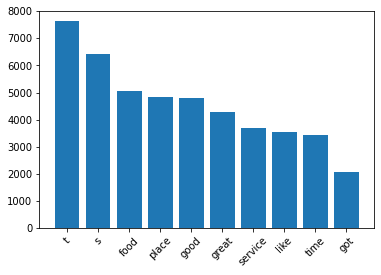

In [ ]:
fig, visual_plot = plt.subplots()

plt.bar(x=list(range(1,11)), height=counts)
plt.xticks(list(range(1,11)), tokens, rotation=45)
plt.show()

In [ ]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,clean_text
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, lo..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[came, lunch, togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[ve, vegas, dozens, times, stepped, foot, circ..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[went, night, closed, street, party, best, act..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3, 5, 4, stars, bad, price, 12, 99, lunch, se..."


In [ ]:
df['clean_text']

0       [beware, fake, fake, fake, small, business, lo...
1       [came, lunch, togo, service, quick, staff, fri...
2       [ve, vegas, dozens, times, stepped, foot, circ...
3       [went, night, closed, street, party, best, act...
4       [3, 5, 4, stars, bad, price, 12, 99, lunch, se...
                              ...                        
9995    [family, hungry, subway, open, 24, hours, guy,...
9996    [wife, came, couple, friends, sever, excited, ...
9997    [food, ok, brag, food, hot, items, tasty, horr...
9998    [today, s, visit, great, love, enjoy, town, sq...
9999    [absolute, worst, place, stayed, 43, year, lif...
Name: clean_text, Length: 10000, dtype: object

In [ ]:
# Visible Testing
assert visual_plot.__module__ == 'matplotlib.axes._subplots', "You must create and assign to visual_plot a visualization"
